# Adriann Liceralde
# WSN - Data Analyzer - Alpha

## USEFUL FUNCTIONS

In [ ]:
NP = DF.to_numpy()
DF = pd.DataFrame(NP)
pd.reset_option('all')

NP = np.column_stack((a, b))
DF = pd.DataFrame(cNP)  
DF.columns = ["A", "B"]
dfs = cDF[~cDF.B.isin(List)]

## LIBRARIES

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from statistics import mean
import IPython.display

## DATA SELECTION
Data files have two columns: UNIXTIME and GASDATA

In [21]:
# Folder - Continiuous Data
year, month, day =  19, 2, 2
os.chdir('C:\\Users\\adria\\OneDrive - University of Utah\\Documents\\Research\\Project 4 Network\\Continuous Data')
data = pd.read_excel(str(month) + "-" + str(day) + "-" + str(year) + '.xlsx')


#os.chdir('C:\\Users\\u1121085\\OneDrive - University of Utah\\Documents\\Research\\Project 4 Network\\Continuous Data')
#data = pd.read_excel(str(month) + "-" + str(day) + "-" + str(year) + '.xlsx')

# Folder - Combo 
#month, day = 2, 4
#extension = ''
#os.chdir('C:\\Users\\adria\\Desktop\\ComboTest')

# Folder - ComboTest
#os.chdir('C:\\Users\\adria\\Desktop\\ComboTest')
#data = pd.read_csv('Combined.csv')
#pd.set_option('display.max_rows', 100000)

## DEFINE FUNCTIONS
These functions will
* Filter out bad data
* Determine missing timestamps
* Extimate missing data

### Import Data
Incoming data has two columns: UNIXTIME and GASDATA. <br>
Function adds two new columns: DATETIME and REALDATA. <br>
REALDATA is a booleon to differentiate sensor values form estimated values. <br>

In [22]:
def importData(data):
    UnixTime = np.array(data['UNIXTIME'],  dtype = float)
    GasData  = np.array(data['CO2'],       dtype = float)
    RealData = np.ones((len(UnixTime), 1), dtype = float)
    Index    = np.arange(0, len(UnixTime))
    DateTime = np.array([])
    
    for i in range(0, len(UnixTime)):
        a = datetime.fromtimestamp(UnixTime[i])
        #DateTime[i] = a
        DateTime = np.append(DateTime, a)
    
    rawAllDataNP = np.column_stack((UnixTime, GasData, DateTime, RealData, Index))
    rawAllDataDF = pd.DataFrame(rawAllDataNP) 
    rawAllDataDF.columns = ['UnixTime', 'GasData', 'DateTime', 'RealData', 'index']
    rawAllDataDF = rawAllDataDF.drop_duplicates(subset='UnixTime', keep='first')
    rawAllDataNP = rawAllDataDF.to_numpy()
    return rawAllDataNP, rawAllDataDF
rawAllDataNP, rawAllDataDF = importData(data)

In [23]:
def importData(data):
    UnixTime = np.array(data['UNIXTIME'],  dtype = float)
    GasData  = np.array(data['CO2'],       dtype = float)
    RealData = np.ones((len(UnixTime), 1), dtype = float)
    Index    = np.arange(0, len(UnixTime))
    
    rawAllDataNP = np.column_stack((UnixTime, GasData, RealData, Index))
    rawAllDataDF = pd.DataFrame(rawAllDataNP) 
    rawAllDataDF.columns = ['UnixTime', 'GasData', 'RealData', 'index']
    rawAllDataDF['DateTime'] = pd.to_datetime(rawAllDataDF['UnixTime'], unit = 's')
    
    rawAllDataDF = rawAllDataDF[['UnixTime', 'GasData', 'DateTime','RealData', 'index']]
    rawAllDataDF = rawAllDataDF.drop_duplicates(subset='UnixTime', keep='first')
    rawAllDataNP = rawAllDataDF.to_numpy()
    return rawAllDataNP, rawAllDataDF
rawAllDataNP, rawAllDataDF = importData(data)


### Import Check
Ensure that the datatypes are correct. <br>
UNIXTIME: Float <br>
CO2:      Float <br>
DATETIME: Timestamp <br>
REALDATA: Bool <br>

In [24]:
def importCheck(rawAllDataNP, rawAllDataDF):
    print('|----------DATA CHECKER ----------|')
    print(rawAllDataNP[0][0], type(rawAllDataNP[0][0]))
    print(rawAllDataNP[0][1], type(rawAllDataNP[0][1]))
    print(rawAllDataNP[0][2], type(rawAllDataNP[0][2]))
    print(rawAllDataNP[0][3], type(rawAllDataNP[0][3]))    
    print('')
#importCheck(rawAllDataNP, rawAllDataDF)

### Data Filter Where
Determine the indeces that have bad data.

In [25]:
def dataFilterWhere(rawAllDataNP):
    #global gasZerosIndices, gasLowIndices, gasHighIndices, gasNegIndices #global timeZerosIndices, timeLowIndices, timeHighIndices, timeNegIndices #global fullRemovalIndices
    gasZerosIndices  = np.where( rawAllDataNP[:,1] == 0)
    gasLowIndices    = np.where((rawAllDataNP[:,1] <= 420) & (rawAllDataNP[:,1] > 0))
    gasHighIndices   = np.where( rawAllDataNP[:,1] >= 5000) 
    gasNegIndices    = np.where( rawAllDataNP[:,1] < 0 )
    timeZerosIndices = np.where( rawAllDataNP[:,0] == 0)
    timeLowIndices   = np.where((rawAllDataNP[:,0] <= 1576594500) & (rawAllDataNP[:,0] > 0))
    timeHighIndices  = np.where( rawAllDataNP[:,0] >= 2000000000)                                               
    timeNegIndices   = np.where( rawAllDataNP[:,0] < 0)

    fullRemovalIndices = np.concatenate((
        gasZerosIndices, gasLowIndices, gasHighIndices, gasNegIndices,
        timeZerosIndices,timeLowIndices,timeHighIndices,timeNegIndices), axis = None)
    
    print('|----------DATA REMOVED----------|')
    print('Gas  Zeros: ', len(gasZerosIndices[0]))
    print('Gas   Lows: ', len(gasLowIndices[0]))
    print('Gas  Highs: ', len(gasHighIndices[0]))
    print('Gas   Negs: ', len(gasNegIndices[0]))
    print('Time Zeros: ', len(timeZerosIndices[0]))
    print('Time  Lows: ', len(timeLowIndices[0]))
    print('Time Highs: ', len(timeHighIndices[0]))
    print('Time  Negs: ', len(timeNegIndices[0]))
    print('Total Remd: ', (len(gasZerosIndices[0]) + len(gasLowIndices[0]) + len(gasHighIndices[0]) + len(gasNegIndices[0]) + len(timeZerosIndices[0]) + len(timeLowIndices[0]) + len(timeHighIndices[0]) + len(timeNegIndices[0])))
    print('Total Remd: ', len(fullRemovalIndices))
    print('')
    return fullRemovalIndices

### Filter Creator
Filter out bad data and create new DataFrame: 
fillAllData

In [26]:
def dataFilterCreator(rawAllDataDF, fullRemovalIndices):
    filAllDataDF = rawAllDataDF[~rawAllDataDF.index.isin(fullRemovalIndices)]
    filAllDataNP = filAllDataDF.to_numpy()
    return filAllDataNP, filAllDataDF

### Frame Selection
Function for frame selector. <br>
Checks validity frame parameter inputs. <br>

In [27]:
def windowSelect(filAllDataNP, leftFrame, rightFrame):
    leftFrameIndex, rightFrameIndex = 0, -1
    leftSuccess,    rightSuccess    = False, False

    for i in range(0, len(filAllDataNP)):
        if (    filAllDataNP[i][0] == leftFrame):
            leftFrameIndex = i
            leftSuccess = True
        if (    filAllDataNP[i][0] == rightFrame):
            rightFrameIndex = i
            rightSuccess = True
            break
    
    if leftSuccess == False:
        print("Left Frame is invalid")
    if rightSuccess == False:
        print("Right Frame is invalid")
    if (leftSuccess == True and rightSuccess == True):
        x  = filAllDataNP[leftFrameIndex:(rightFrameIndex+1),0]
        y1 = filAllDataNP[leftFrameIndex:(rightFrameIndex+1),1]
        y2 = filAllDataNP[leftFrameIndex:(rightFrameIndex+1),2]
        y3 = filAllDataNP[leftFrameIndex:(rightFrameIndex+1),3]
        theoFrameSpan  = int((rightFrame - leftFrame) + 1)
        trueFrameSpan  = len(x)
        
        plt.close('all')   
        plt.plot(x, y1, "ro")
        plt.plot(x, y1, "k-")
        plt.grid()
        
        print("|----------PLOT FRAME ----------|")
        print("Left  Index is", leftFrameIndex)
        print("Right Index is", rightFrameIndex)
        print("")
        print("Frame Span is", theoFrameSpan, "seconds")
        print("Frame  Amt is", trueFrameSpan, "points")
        print("Δ is", theoFrameSpan - trueFrameSpan)
        print("")
        
        fraAllDataNP = np.column_stack((x, y1, y2, y3))
        fraAllDataDF = pd.DataFrame(fraAllDataNP)
        fraAllDataDF.columns = ["UnixTime", "GasData", "DateTime", "RealData"]
    else:
        print("Frame Selection Failed") 
    return fraAllDataNP, fraAllDataDF

### Missing Data Determiner
Iterates over every single timestamp and checks if it is in DataFrame.

In [9]:
def missingDataDeterminer(data):
    leftFrameUnix  = data[0][0]
    rightFrameUnix = data[-1][0] 
    spanFrameUnix  = np.arange(leftFrameUnix, rightFrameUnix+1)
    
    missingData = np.array([])
    s = set(data[:,0])
    for i in range(0, len(spanFrameUnix)):
        if spanFrameUnix[i] not in s:
            missingData = np.append(missingData, spanFrameUnix[i]) 
    print(len(missingData), "missing points from", [name for name in globals() if globals()[name] is data])
    return missingData



### Estimate Data
If there is a missing data point in between two real data, make an estimate.

In [10]:
def estimateData(missingFra):
    misDT, misGas = np.array([]), np.array([])
    misReal =  np.ones(len(missingFra), dtype=bool)
    for j in missingFra:
        a = datetime.fromtimestamp(j)
        misDT = np.append(misDT, a)
        left  = j - 1
        right = j + 1
        
        if ((left in filAllDataNP[:,0]) & (right in filAllDataNP[:,0])) == True:
            leftIndex  = np.where(filAllDataNP[:,0] == left)
            rightIndex = np.where(filAllDataNP[:,0] == right)
            leftData   = filAllDataNP[leftIndex[0][0]][1]
            rightData  = filAllDataNP[rightIndex[0][0]][1]
            if (abs(leftData - rightData) <= 5.0) :
                midData = (leftData + rightData) / 2
                misGas  = np.append(misGas, midData)
            else:
                misGas  = np.append(misGas, None)
        else:
            misGas  = np.append(misGas, None)
    
    unsUnix= np.concatenate((fraAllDataNP[:,0], missingFra), axis = 0)
    unsGas = np.concatenate((fraAllDataNP[:,1], misGas),     axis = 0)
    unsDT  = np.concatenate((fraAllDataNP[:,2], misDT),      axis = 0)
    unsReal= np.concatenate((fraAllDataNP[:,3], misReal),    axis = 0)
    Datum = {'UnixTime': unsUnix,
             'GasData' : unsGas,
             'DateTime': unsDT,
             'RealData': unsReal}
    df  = pd.DataFrame(Datum, columns = ['UnixTime', 'GasData', 'DateTime', 'RealData'])
    dfs = df.sort_values(by = ['UnixTime'], inplace = False)
    dfs = dfs.reset_index(drop=True)
    
    dfs.UnixTime = dfs.UnixTime.astype(int)
    dfs.GasData  = dfs.GasData.astype(float)
    dfs.RealData = dfs.RealData.astype(int)
    dfs = dfs[dfs.GasData != 0.0]

    estAllDataDF = dfs.reset_index(drop=True)
    estAllDataNP = estAllDataDF.to_numpy()
    
    nanCounter   = 0
    for k in estAllDataNP[:,1]:
        if np.isnan(k) == True:
            nanCounter += 1
            
    return estAllDataNP, estAllDataDF, nanCounter


### Average Data
Rolling Average

In [11]:
def averageData(estAllDataDF, interval):
    avgAllDataDF = estAllDataDF.groupby(pd.Grouper(key='DateTime', freq=interval)).mean().dropna()
    avgAllDataDF['UnixTime'] = avgAllDataDF['UnixTime'].astype(int)
    avgAllDataDF['DateTime'] = pd.to_datetime(avgAllDataDF['UnixTime'], unit = 's')
    avgAllDataNP = avgAllDataDF.to_numpy()
    return avgAllDataNP, avgAllDataDF

## MAIN CODE

### Import and Filter Data

In [12]:
rawAllDataNP, rawAllDataDF = importData(data)
importCheck(rawAllDataNP, rawAllDataDF)
fullRemovalIndices = dataFilterWhere(rawAllDataNP)
filAllDataNP, filAllDataDF = dataFilterCreator(rawAllDataDF, fullRemovalIndices)

|----------DATA CHECKER ----------|
1576728619.0 <class 'float'>
1013.0 <class 'float'>
2019-12-19 04:10:19 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
1.0 <class 'float'>

|----------DATA REMOVED----------|
Gas  Zeros:  0
Gas   Lows:  3
Gas  Highs:  0
Gas   Negs:  0
Time Zeros:  0
Time  Lows:  0
Time Highs:  0
Time  Negs:  0
Total Remd:  3
Total Remd:  3



### Frame Select

|----------PLOT FRAME ----------|
Left  Index is 0
Right Index is 40175

Frame Span is 41670 seconds
Frame  Amt is 40176 points
Δ is 1494



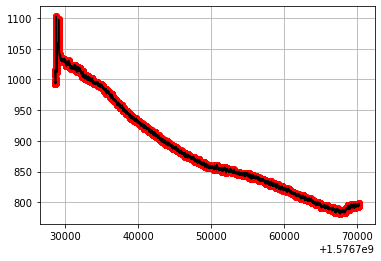

In [13]:
leftFrame  = filAllDataNP[0][0]
rightFrame = filAllDataNP[-1][0]
fraAllDataNP, fraAllDataDF = windowSelect(filAllDataNP, leftFrame, rightFrame)

### Missing Data

In [14]:
print("|----------MISSING DATA ----------|")
missingRaw = missingDataDeterminer(rawAllDataNP)
missingFil = missingDataDeterminer(filAllDataNP)
missingFra = missingDataDeterminer(fraAllDataNP)
estAllDataNP, estAllDataDF, nanCounter = estimateData(missingFra)

|----------MISSING DATA ----------|
1491 missing points from ['rawAllDataNP']
1494 missing points from ['filAllDataNP']
1494 missing points from ['fraAllDataNP']


### Cut Data

In [28]:
cutAllDataDF = estAllDataDF.dropna()
cutAllDataNP = cutAllDataDF.to_numpy()
cutAllDataDF

,UnixTime,GasData,DateTime,RealData
0,1576728619,1013.0,2019-12-19 04:10:19,1
1,1576728620,1015.0,2019-12-19 04:10:20,1
2,1576728621,1015.0,2019-12-19 04:10:21,1
3,1576728622,1013.0,2019-12-19 04:10:22,1
4,1576728623,1012.0,2019-12-19 04:10:23,1
...,...,...,...,...
41665,1576770284,797.0,2019-12-19 15:44:44,1
41666,1576770285,798.0,2019-12-19 15:44:45,1
41667,1576770286,798.0,2019-12-19 15:44:46,1
41668,1576770287,798.0,2019-12-19 15:44:47,1


In [45]:
avgAllDataDF1

,UnixTime,GasData,RealData,DateTime
DateTime,,,,
2019-12-18 21:10:20,1576728628,1009.500000,1.0,2019-12-19 04:10:28
2019-12-18 21:11:00,1576728663,994.000000,1.0,2019-12-19 04:11:03
2019-12-18 21:11:30,1576728694,997.000000,1.0,2019-12-19 04:11:34
2019-12-18 21:12:00,1576728724,995.000000,1.0,2019-12-19 04:12:04
2019-12-18 21:12:30,1576728755,1079.500000,1.0,2019-12-19 04:12:35
...,...,...,...,...
2019-12-19 15:44:00,1576770244,794.700000,1.0,2019-12-19 15:44:04
2019-12-19 15:44:10,1576770254,794.500000,1.0,2019-12-19 15:44:14
2019-12-19 15:44:20,1576770264,795.777778,1.0,2019-12-19 15:44:24


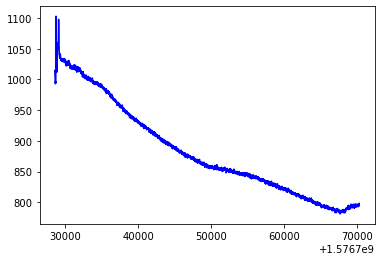

In [41]:
plt.plot(cutAllDataNP[:,0], cutAllDataNP[:,1],'b')
#plt.plot(estAllDataNP[:,0], estAllDataNP[:,1], 'r-')

### Average Data

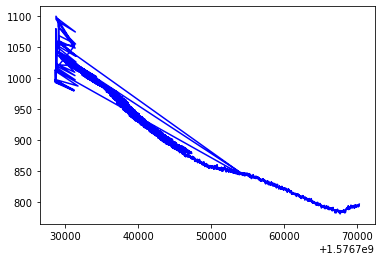

In [46]:
avgAllDataNP1, avgAllDataDF1 = averageData(cutAllDataDF, '10s')
avgAllDataNP2, avgAllDataDF2 = averageData(cutAllDataDF, '30s')
avgAllDataNP3, avgAllDataDF3 = averageData(cutAllDataDF, '60s')

#plt.plot(cutAllDataNP[:,0], cutAllDataNP[:,1], 'r')
plt.plot(avgAllDataNP1[:,0], avgAllDataNP1[:,1], 'b-')
plt.show()

In [17]:
print('|----------NEW DATA SUMMARY----------|')
print('RawNP: ', len(rawAllDataNP[:,0]), len(rawAllDataNP[:,1]), len(rawAllDataNP[:,2]), len(rawAllDataNP[:,3]))
print('RawDF: ', len(rawAllDataDF[['UnixTime']]), len(rawAllDataDF[['GasData']]), len(rawAllDataDF[['DateTime']]), len(rawAllDataDF[['RealData']]))
print('FilNP: ', len(filAllDataNP[:,0]), len(filAllDataNP[:,1]), len(filAllDataNP[:,2]), len(filAllDataNP[:,3]))
print('FilDF: ', len(filAllDataDF[['UnixTime']]), len(filAllDataDF[['GasData']]), len(filAllDataDF[['DateTime']]), len(filAllDataDF[['RealData']]))
print('Δ    : ', len(rawAllDataNP[:,0]) - len(filAllDataNP[:,0]), "points were filtered out")
print('')
print('Should Have:', int((filAllDataNP[-1][0] - filAllDataNP[0][0])+1), "points in data")
print('Should Have:', int((fraAllDataNP[-1][0] - fraAllDataNP[0][0])+1), "points in frame")
print('')
print('FraNP: ', len(fraAllDataNP[:,0]), len(fraAllDataNP[:,1]), len(fraAllDataNP[:,2]), len(fraAllDataNP[:,3]))
print('FraDF: ', len(fraAllDataDF[['UnixTime']]), len(fraAllDataDF[['GasData']]), len(fraAllDataDF[['DateTime']]), len(fraAllDataDF[['RealData']]))
print('EstNP: ', len(estAllDataNP[:,0]), len(estAllDataNP[:,1]), len(estAllDataNP[:,2]), len(estAllDataNP[:,3]))
print('EstDF: ', len(estAllDataDF[['UnixTime']]), len(estAllDataDF[['GasData']]), len(estAllDataDF[['DateTime']]), len(estAllDataDF[['RealData']]))
print('Δ    : ', len(estAllDataDF[['UnixTime']]) - len(fraAllDataDF[['UnixTime']]), 'total were added in')
print('nan  : ', nanCounter, 'are nan values')
print('Thus : ', ((len(estAllDataDF[['UnixTime']]) - len(fraAllDataDF[['UnixTime']])) - nanCounter), 'real estimated points added')
print('')
print('CutNP: ', len(cutAllDataNP[:,0]), len(cutAllDataNP[:,1]), len(cutAllDataNP[:,2]), len(cutAllDataNP[:,3]))
print('CutDF: ', len(cutAllDataDF[['UnixTime']]), len(cutAllDataDF[['GasData']]), len(cutAllDataDF[['DateTime']]), len(cutAllDataDF[['RealData']]))
print('AvgNP: ', len(avgAllDataNP1[:,0]), len(avgAllDataNP1[:,1]), len(avgAllDataNP1[:,2]), len(avgAllDataNP1[:,3]))
print('AvgDF: ', len(avgAllDataDF1[['UnixTime']]), len(avgAllDataDF1[['GasData']]), len(avgAllDataDF1[['DateTime']]), len(avgAllDataDF1[['RealData']]))
print('')

|----------NEW DATA SUMMARY----------|
RawNP:  40179 40179 40179 40179
RawDF:  40179 40179 40179 40179
FilNP:  40176 40176 40176 40176
FilDF:  40176 40176 40176 40176
Δ    :  3 points were filtered out

Should Have: 41670 points in data
Should Have: 41670 points in frame

FraNP:  40176 40176 40176 40176
FraDF:  40176 40176 40176 40176
EstNP:  41670 41670 41670 41670
EstDF:  41670 41670 41670 41670
Δ    :  1494 total were added in
nan  :  140 are nan values
Thus :  1354 real estimated points added

CutNP:  41530 41530 41530 41530
CutDF:  41530 41530 41530 41530
AvgNP:  4976 4976 4976 4976
AvgDF:  4976 4976 4976 4976



### Plot 10s

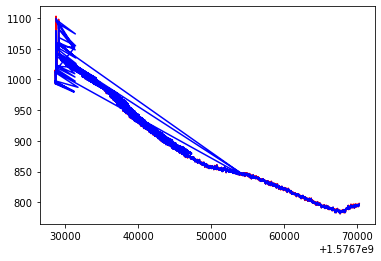

In [21]:
plt.plot(cutAllDataNP[:,0], cutAllDataNP[:,1], 'r')
plt.plot(avgAllDataNP1[:,0], avgAllDataNP1[:,1], 'b-')
plt.show()

### Plot 30s

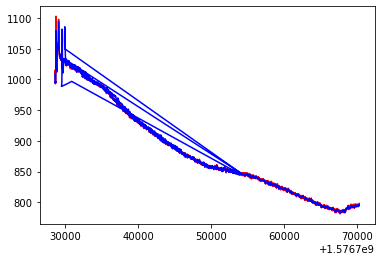

In [22]:
plt.plot(cutAllDataNP[:,0], cutAllDataNP[:,1], 'r')
plt.plot(avgAllDataNP2[:,0], avgAllDataNP2[:,1], 'b-')
plt.show()

### Plot 60s

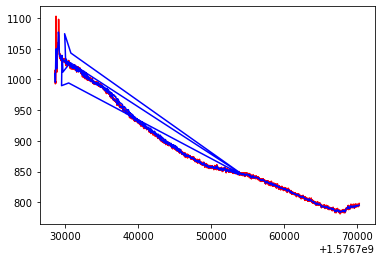

In [23]:
plt.plot(cutAllDataNP[:,0], cutAllDataNP[:,1], 'r')
plt.plot(avgAllDataNP3[:,0], avgAllDataNP3[:,1], 'b-')
plt.show()

### Combo Plot

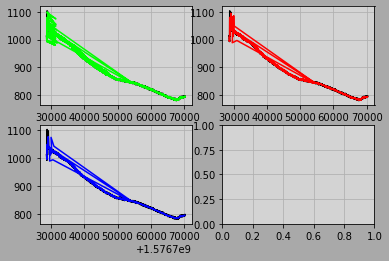

In [24]:
plt.close('all')
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_facecolor("lightgrey")
ax2.set_facecolor("lightgrey")
ax3.set_facecolor("lightgrey")
ax4.set_facecolor("lightgrey")
fig1.patch.set_facecolor('darkgrey')
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.plot(cutAllDataNP[:,0],  cutAllDataNP[:,1], 'k')
ax1.plot(avgAllDataNP1[:,0], avgAllDataNP1[:,1],'lime')
ax2.plot(cutAllDataNP[:,0],  cutAllDataNP[:,1], 'k')
ax2.plot(avgAllDataNP2[:,0], avgAllDataNP2[:,1],'r')
ax3.plot(cutAllDataNP[:,0],  cutAllDataNP[:,1], 'k')
ax3.plot(avgAllDataNP3[:,0], avgAllDataNP3[:,1],'b')
plt.show()

C:\Users\u1121085\Documents\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


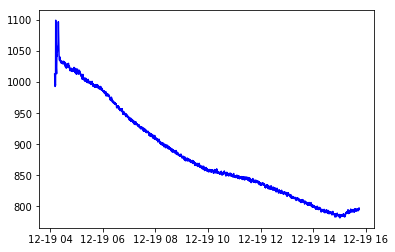

In [23]:
avgAllDataNP4, avgAllDataDF4 = averageData(cutAllDataDF, '5min')
#plt.plot(cutAllDataNP[:,2], cutAllDataNP[:,1], 'r')
plt.plot(avgAllDataNP1[:,3], avgAllDataNP1[:,1], 'b-')
plt.show()

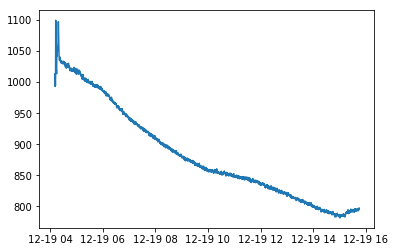

In [24]:
y = avgAllDataNP1[0:10000,1]
x = avgAllDataNP1[0:10000,3]
plt.plot(x, y)

In [ ]:
y = avgAllDataNP1[0:10000,1]
x = avgAllDataNP1[0:10000,3]
plt.plot(x, y)

In [124]:
#len(fraAllDataNP)
len(avgAllDataNP1)

312

In [ ]:
rawAllDataNP, rawAllDataDF = importData(data)
importCheck(rawAllDataNP, rawAllDataDF)
fullRemovalIndices = dataFilterWhere(rawAllDataNP)
filAllDataNP, filAllDataDF = dataFilterCreator(rawAllDataDF, fullRemovalIndices)
leftFrame  = filAllDataNP[0][0]
rightFrame = filAllDataNP[-1][0]
fraAllDataNP, fraAllDataDF = windowSelect(filAllDataNP, leftFrame, rightFrame)
print("|----------MISSING DATA ----------|")
missingRaw = missingDataDeterminer(rawAllDataNP)
missingFil = missingDataDeterminer(filAllDataNP)
missingFra = missingDataDeterminer(fraAllDataNP)
estAllDataNP, estAllDataDF, nanCounter = estimateData(missingFra)
cutAllDataDF = estAllDataDF.dropna()
cutAllDataNP = cutAllDataDF.to_numpy()

rawAllData <br>
filAllData <br>
fraAllData <br>
estAllData <br>
cutAllData <br>
avgAllData <br>

In [36]:
print('Raw', len(rawAllDataDF))
print('Fil', len(filAllDataDF))
print('Fra', len(fraAllDataDF))
print('Est', len(estAllDataDF))
print('Cut', len(cutAllDataDF))
print('Avg1', len(avgAllDataDF1))
print('Avg2', len(avgAllDataDF2))
print('Avg3', len(avgAllDataDF3))

Raw 40179
Fil 40176
Fra 40176
Est 41670
Cut 41530
Avg1 4155
Avg2 1386
Avg3 694


In [45]:
tim0 = rawAllDataNP[0,0]
tim1 = cutAllDataNP[0,0]
tim2 = avgAllDataNP1[0,0]
dat0 = rawAllDataNP[0,2]
dat1 = cutAllDataNP[0, 2]
dat2 = avgAllDataNP1[0,3]
print(tim0, tim1, tim2)
print(dat0, dat1, dat2)

1576728619.0 1576728619 1576728619
2019-12-18 21:10:19 2019-12-18 21:10:19 2019-12-19 04:10:19


In [48]:
rawAllDataDF

,UnixTime,GasData,DateTime,RealData,index
0,1576728619,1013,2019-12-18 21:10:19,1,0
1,1576728620,1015,2019-12-18 21:10:20,1,1
2,1576728621,1015,2019-12-18 21:10:21,1,2
3,1576728622,1013,2019-12-18 21:10:22,1,3
4,1576728623,1012,2019-12-18 21:10:23,1,4
5,1576728624,1011,2019-12-18 21:10:24,1,5
6,1576728625,1011,2019-12-18 21:10:25,1,6
7,1576728626,1010,2019-12-18 21:10:26,1,7
8,1576728627,1010,2019-12-18 21:10:27,1,8
9,1576728629,1009,2019-12-18 21:10:29,1,9
